<a href="https://colab.research.google.com/github/animakumawat/CNN-tensorflow/blob/main/binary_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Setup and load data**

In [1]:
import tensorflow as tf
import os

import cv2
import imghdr #allows to check file extension for images

In [37]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


##### **Remove dodgy images**

In [38]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/image-classification/data'
os.listdir(data_dir)

['happy', 'sad']

In [39]:
image_exts = ['jpeg','jpg','bmp','png']

In [40]:
for image_class in os.listdir(data_dir): #looping through every single directory folder
  for image in os.listdir(os.path.join(data_dir, image_class)): #looping through every single image in subdirectory
    image_path = os.path.join(data_dir, image_class, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
          print('Image not in extension list {}'.format(image_path))
          os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


Image not in extension list /content/drive/MyDrive/Colab Notebooks/image-classification/data/happy/happy-too-happy.gif
Image not in extension list /content/drive/MyDrive/Colab Notebooks/image-classification/data/happy/closeup-handsome-caucasian-man-smiling-260nw-1916156374.jpg
Image not in extension list /content/drive/MyDrive/Colab Notebooks/image-classification/data/happy/.DS_Store
Image not in extension list /content/drive/MyDrive/Colab Notebooks/image-classification/data/happy/portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in extension list /content/drive/MyDrive/Colab Notebooks/image-classification/data/happy/depositphotos_13154963-stock-photo-happy-woman-jumping-in-golden.jpg
Image not in extension list /content/drive/MyDrive/Colab Notebooks/image-classification/data/happy/traitshappypeople.jpg.webp
Image not in extension list /content/drive/MyDrive/Colab Notebooks/image-classification/data/happy/happy-group-young-people-cheerful-260nw-1563846544.jpg
Image 

##### **Load data**

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/image-classification/data') #building a data pipeline
data_iterator = data.as_numpy_iterator() #allowing access to generator from data pipeline
batch = data_iterator.next() #grabing one batch

Found 365 files belonging to 2 classes.


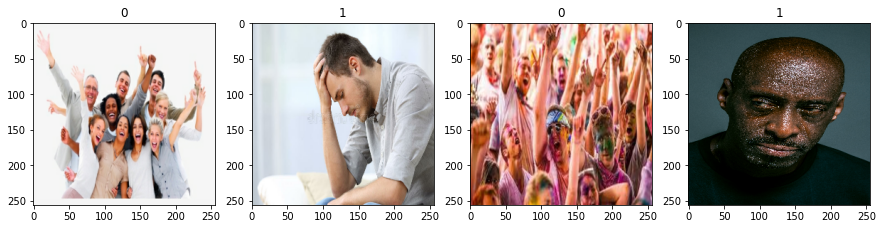

In [42]:
fig, ax = plt.subplots(ncols=4, figsize=(15,15))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
# class 1 = sad
# class 0 = happy

#### **Preprocess data**

##### **Scale data**

In [43]:
data = data.map(lambda x,y: (x/255, y)) #scaling on data pipeline
data.as_numpy_iterator().next()

(array([[[[0.4122549 , 0.71004903, 0.7997549 ],
          [0.43456697, 0.7286846 , 0.81103754],
          [0.45679045, 0.743065  , 0.8175748 ],
          ...,
          [0.4893885 , 0.7496826 , 0.82541794],
          [0.47172132, 0.738388  , 0.82074094],
          [0.45906863, 0.7257353 , 0.80808824]],
 
         [[0.42229626, 0.7164139 , 0.8061198 ],
          [0.4387499 , 0.73286754, 0.8152205 ],
          [0.45735294, 0.7436274 , 0.8181372 ],
          ...,
          [0.49163076, 0.7519249 , 0.8276602 ],
          [0.48161   , 0.7404335 , 0.826708  ],
          [0.4652808 , 0.7319475 , 0.8143004 ]],
 
         [[0.43305328, 0.72717094, 0.8168768 ],
          [0.45055914, 0.73291206, 0.81918657],
          [0.4625    , 0.7463235 , 0.8220588 ],
          ...,
          [0.5011656 , 0.75606763, 0.834499  ],
          [0.4860701 , 0.7448936 , 0.8311681 ],
          [0.4699219 , 0.73609835, 0.8186964 ]],
 
         ...,
 
         [[0.2662071 , 0.65167737, 0.76540285],
          [0.28652

##### **Split data**

In [44]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [45]:
train = data.take(train_size) #allocating batches of shuffled data
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

#### **DL Model**

##### **Build DL model**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [46]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

##### **Train DNN**

In [48]:
logdir = '/content/drive/MyDrive/Colab Notebooks/image-classification/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 28s 3s/step - loss: 1.1744 - accuracy: 0.5312 - val_loss: 0.6759 - val_accuracy: 0.5729
Epoch 2/20
8/8 [==============================] - 29s 3s/step - loss: 0.6765 - accuracy: 0.5391 - val_loss: 0.6704 - val_accuracy: 0.5208
Epoch 3/20
8/8 [==============================] - 23s 2s/step - loss: 0.6592 - accuracy: 0.5352 - val_loss: 0.6511 - val_accuracy: 0.5312
Epoch 4/20
8/8 [==============================] - 27s 3s/step - loss: 0.6304 - accuracy: 0.5820 - val_loss: 0.5851 - val_accuracy: 0.6354
Epoch 5/20
8/8 [==============================] - 27s 3s/step - loss: 0.5679 - accuracy: 0.6836 - val_loss: 0.5632 - val_accuracy: 0.7188
Epoch 6/20
8/8 [==============================] - 27s 3s/step - loss: 0.5205 - accuracy: 0.7461 - val_loss: 0.4454 - val_accuracy: 0.8021
Epoch 7/20
8/8 [==============================] - 27s 3s/step - loss: 0.4442 - accuracy: 0.8320 - val_loss: 0.3458 - val_accuracy: 0.8750
Epoch 8/20
8/8 [==================

##### **Plot Performance**

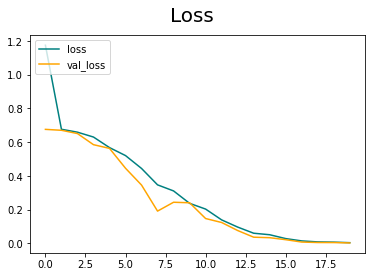

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

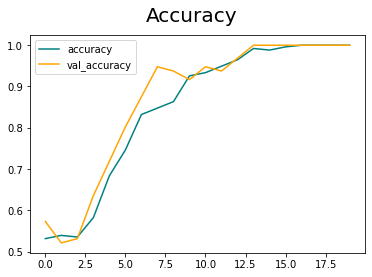

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### **Evaluate**

In [52]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

1/1 [==============================] - 0s 262ms/step
Precision:1.0, Recall:1.0, Accuracy:1.0
